In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170500096/170498071 [==============================] - 87s 1us/step


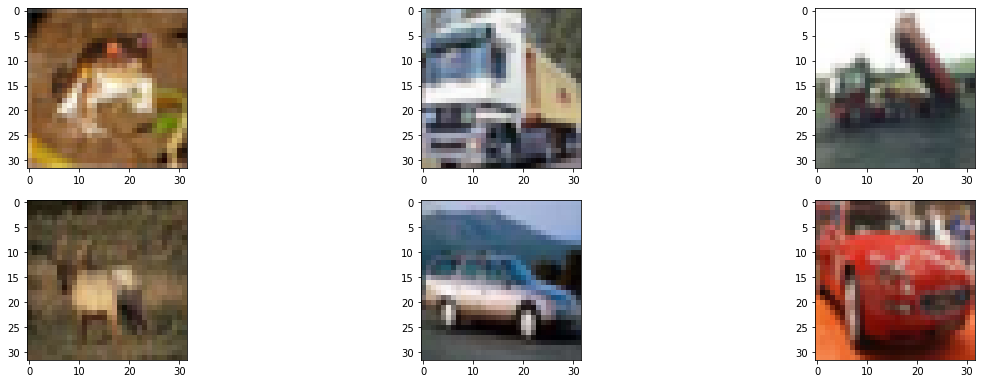

In [3]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [5]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [6]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [11]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 251s 161ms/step - loss: 1.7086 - accuracy: 0.3824 - val_loss: 1.4155 - val_accuracy: 0.4949
Epoch 2/10
1563/1563 [==============================] - 223s 143ms/step - loss: 1.3724 - accuracy: 0.5043 - val_loss: 1.2502 - val_accuracy: 0.5502
Epoch 3/10
1563/1563 [==============================] - 205s 131ms/step - loss: 1.2098 - accuracy: 0.5645 - val_loss: 1.1436 - val_accuracy: 0.5911
Epoch 4/10
1563/1563 [==============================] - 213s 136ms/step - loss: 1.0973 - accuracy: 0.6111 - val_loss: 1.0703 - val_accuracy: 0.6175
Epoch 5/10
1563/1563 [==============================] - 211s 135ms/step - loss: 0.9996 - accuracy: 0.6440 - val_loss: 1.0196 - val_accuracy: 0.6381
Epoch 6/10
1563/1563 [==============================] - 213s 136ms/step - loss: 0.9222 - accuracy: 0.6727 - val_loss: 0.9874 - val_accuracy: 0.6504
Epoch 7/10
1563/1563 [==============================] - 251s 161ms/step - loss: 0.8512 - accuracy: 0.6980 - val_

In [12]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 4s 12ms/step - loss: 0.9401 - accuracy: 0.6809
68.0899977684021


In [13]:
model.save("model1_cifar_10epoch.h5")

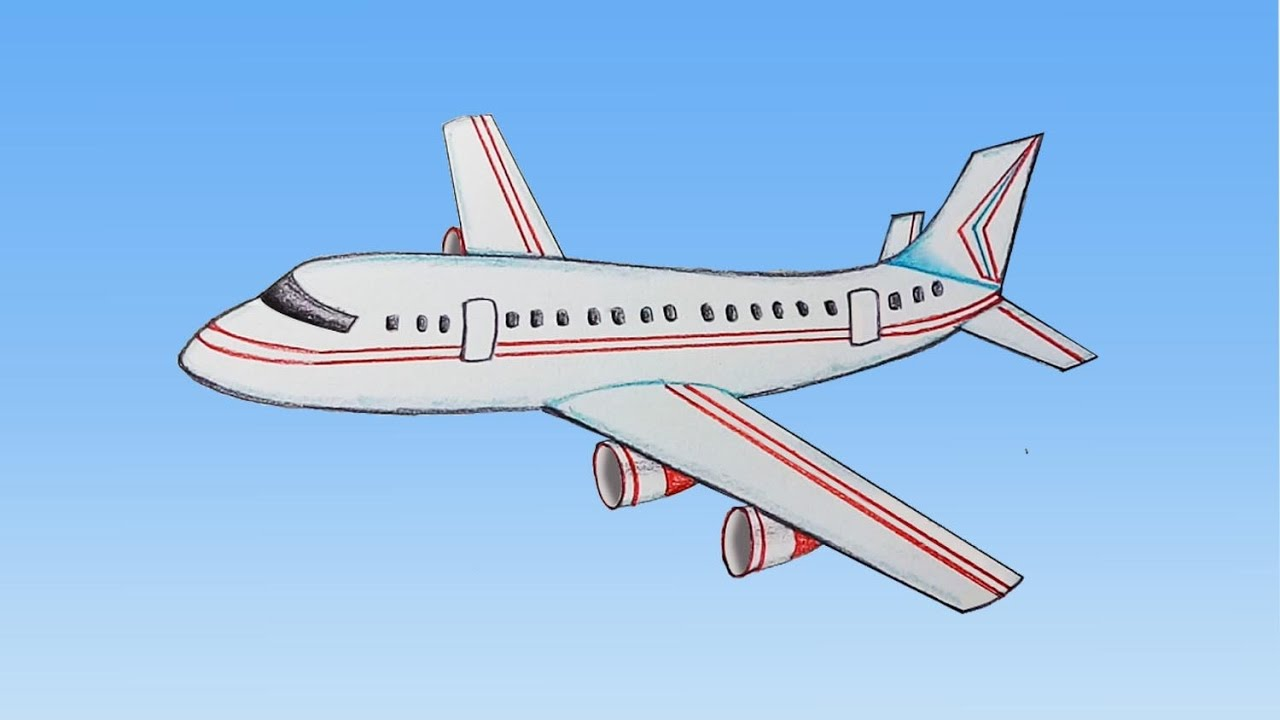

In [29]:
from IPython.display import Image
Image(filename="a2.png")

In [30]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("a2.png")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

0 aeroplane


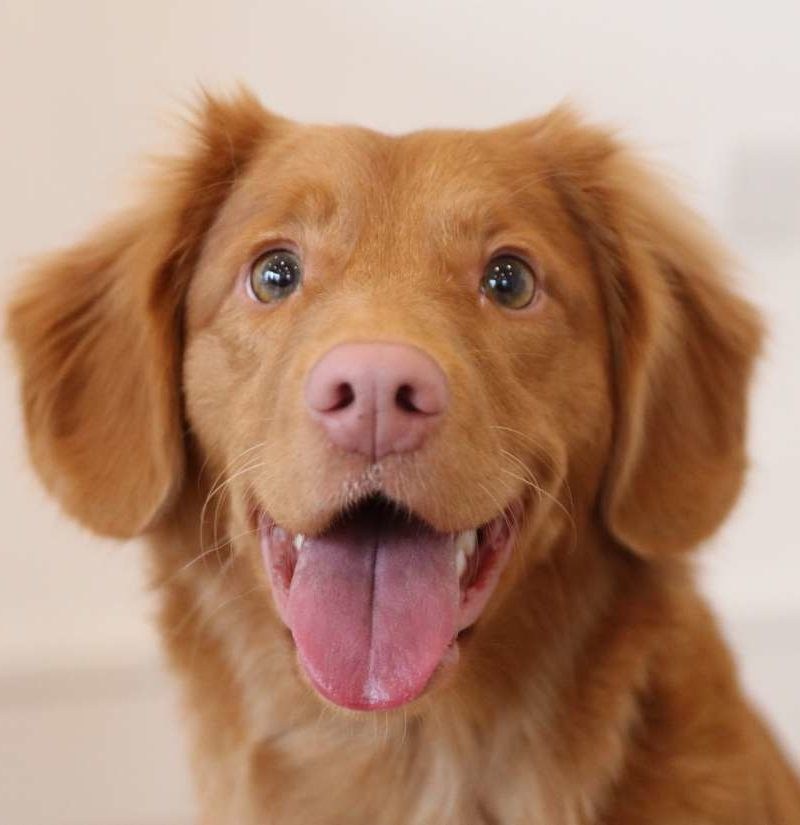

In [33]:
from IPython.display import Image
Image(filename="d2.png")

In [32]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("d2.png")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

5 dog
